#### Task 1. 

In [2]:
import os
import pandas as pd
import networkx as nx

path='/Users/[editted]/Dropbox/work/compsoc/dataset/MA_cbg_human_mobility_2019'
os.chdir(path)
print('files in the folder:', os.listdir())

files in the folder: ['MA_cbg2cbg_2019_09.csv', 'MA_cbg2cbg_2019_08.csv', '.DS_Store', 'test.csv', 'README.txt', 'MA_cbg2cbg_2019_03.csv', '.ipynb_checkpoints', 'MA_cbg2cbg_2019_02.csv', 'MA_cbg2cbg_2019_01.csv', 'MA_cbg2cbg_2019_05.csv', 'MA_cbg2cbg_2019_11.csv', 'MA_cbg2cbg_2019_10.csv', 'MA_cbg2cbg_2019_04.csv', 'MA_cbg2cbg_2019_12.csv', 'MA_cbg2cbg_2019_06.csv', 'MA_linecounts.json', 'MA_cbg2cbg_2019_07.csv']


In [3]:
ma_df = pd.read_csv('MA_cbg2cbg_2019_01.csv')

G = nx.Graph()

for i in range(len(ma_df)):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)

print(nx.info(G))

Graph with 40292 nodes and 742299 edges


/var/folders/1b/s20n0f295fn5s0f986q3fppc0000gn/T/ipykernel_11050/1199343417.py:13: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


#### Task 2. 

In [30]:
mn_df=pd.DataFrame(G.degree(), columns=['node', 'degree'])
mn_w_df=pd.DataFrame(G.degree(weight='weight'), columns=['node', 'weighted degree'])
mn_w_uw= mn_df.merge(mn_w_df, how='left', on='node')
mn_w_uw

,node,degree,weighted degree
0,250250303003,2936,1.617298
1,250251010016,609,1.829781
2,440070008003,77,0.201907
3,250250923002,600,2.675362
4,250173686001,3217,1.763752
...,...,...,...
40287,170318261003,1,0.000726
40288,120310144111,1,0.000726
40289,530330294073,1,0.000726
40290,360610165001,1,0.000726


In [5]:
print(mn_w_uw['weighted degree'].describe())

count    40292.000000
mean         0.177012
std          0.454297
min          0.000046
25%          0.001137
50%          0.004208
75%          0.015191
max          4.507224
Name: weighted degree, dtype: float64


#### Task 3. 

<AxesSubplot:xlabel='weighted degree', ylabel='Count'>

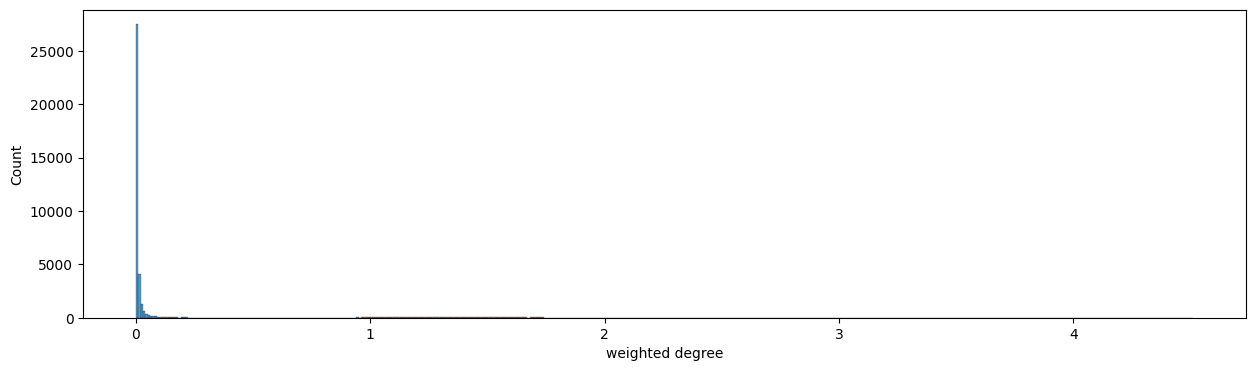

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,4))
sns.histplot(x='weighted degree', data=mn_w_uw, binwidth=0.01)
# This distribution of the weighted node degrees is following a power law because there are a few nodes that have a higer level of weighted degrees while most of nodes' weighted degrees are close to 0 .

<AxesSubplot:xlabel='weighted degree', ylabel='Count'>

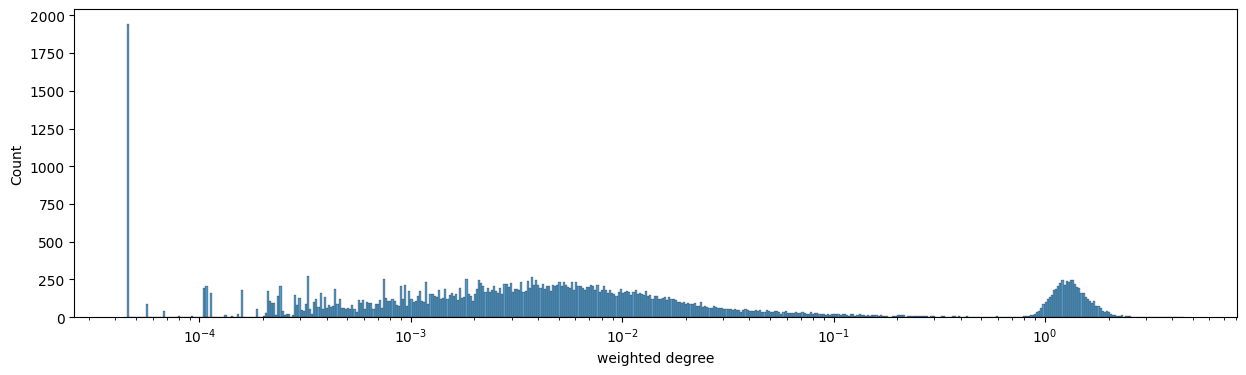

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,4))
sns.histplot(x='weighted degree', data=mn_w_uw, binwidth=0.01, log_scale=True)
# This distribution of the weighted node degrees is following a power law because there are some nodes that have a higer level of weighted degrees while most of nodes' weighted degrees are close to 0 .